<a href="https://colab.research.google.com/github/mevangelista-alvarado/machine_learning/blob/main/RedNeuronalRecurrente_Ejemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

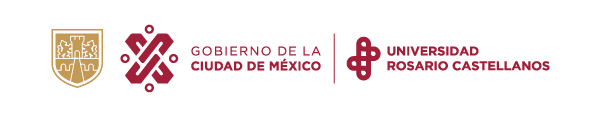

## Introducción

En este ejemplo, construiremos una red neuronal recurrente (RNN) para predecir la siguiente palabra en una secuencia de palabras en un enfoque de procesamiento de lenguaje natural (NLP) con `Numpy`.

## Implementación en Python

__Importación de Bibliotecas__

Importamos los módulos necesarios

In [24]:
import numpy as np

__Datos de Entrenamiento__

Definimos los datos de entrenamiento, que es una cadena de texto.

In [25]:
# Datos de entrenamiento
text = "Hola, ¿cómo estás? Soy una red neuronal recurrente simple. Hago predicción de secuencias de palabras."

Obtenemos todas las palabras de nuestro texto

In [26]:
words = text.split()

Definimos dos diccionarios de la siguiente manera

*   Diccionario 1:  
    `{"index": "word"}`
*   Diccionario 1:  
    `{"word": "index"}`

que mapean cada palabra única a un índice y viceversa.

Esto es útil para convertir palabras en números enteros y viceversa.

In [27]:
# Tokenizacion
word_to_idx = {word: idx for idx, word in enumerate(words)}
idx_to_word = {idx: word for idx, word in enumerate(words)}

__Preparación de Datos de Entrada y Salida__

In [28]:
seq_length = 3 # Puedes cambir por otro numero, por ejemplo 5.
X = []
y = []

for i in range(len(words) - seq_length):
    seq_in = words[i:i + seq_length]
    seq_out = words[i + seq_length]
    X.append([word_to_idx[word] for word in seq_in])
    y.append(word_to_idx[seq_out])

X = np.array(X)
y = np.array(y)

Establecemos `seq_length` en `3`, lo que significa que vamos a tomar secuencias de 3 caracteres como entrada y tratar de predecir el siguiente carácter.  

Creamos dos listas, `X` e `y`, donde `X` contendrá las secuencias de entrada codificadas como números enteros e `y` contendrá las palabras de destino codificados de la misma manera.

Luego, convertimos estas listas en matrices `NumPy` para facilitar el procesamiento.

__Creación del Modelo RNN__

_Hiperparámetros_

In [29]:
input_size = len(words)
hidden_size = 32
output_size = len(words)
learning_rate = 0.1

Se definen varios hiperparámetros importantes:
* `input_size`:  
    La cantidad total de palabras en el vocabulario.
* `hidden_size`:  
    La dimensión del estado oculto de la RNN.
* `output_size`:  
    La cantidad total de palabras en el vocabulario (misma que input_size en este caso).
* `learning_rate`:
    La tasa de aprendizaje utilizada en la actualización de pesos.

_Inicialización de Pesos y Bias_

In [30]:
np.random.seed(0)
Wxh = np.random.randn(hidden_size, input_size)
Whh = np.random.randn(hidden_size, hidden_size)
Why = np.random.randn(output_size, hidden_size)
bh = np.zeros((hidden_size, 1))
by = np.zeros((output_size, 1))

Se inicializan los pesos y bias de la RNN de manera aleatoria utilizando `np.random.randn` para crear matrices de pesos y bias inicializados en ceros.

* Wxh:  
    Matriz de pesos que mapea las entradas (las representaciones de palabras) a los estados ocultos de la RNN en un solo paso de tiempo. Su forma es (hidden_size, input_size).  
    
    Esta matriz controla cómo las palabras de entrada afectan el estado oculto en el paso de tiempo actual.

* `Whh`:  
    Matriz de pesos que mapea los estados ocultos anteriores a los estados ocultos actuales en un solo paso de tiempo. Su forma es (hidden_size, hidden_size).
    
    Esta matriz controla cómo los estados ocultos previos influyen en los estados ocultos actuales, lo que permite que la RNN capture dependencias a lo largo del tiempo.

* `Why`:  
    Matriz de pesos que mapea los estados ocultos a las salidas de la RNN (las probabilidades de las palabras objetivo) en un solo paso de tiempo. Su forma es (output_size, hidden_size).
    
    Esta matriz controla cómo los estados ocultos se utilizan para predecir la siguiente palabra.

* `bh`:  
    Vector de bias para los estados ocultos.
    
    Es un vector de tamaño (hidden_size, 1) que se agrega a los estados ocultos antes de aplicar la función de activación.

* `by`:  
    Vector de bias para las salidas (las probabilidades de las palabras objetivo).
    
    Es un vector de tamaño (output_size, 1) que se agrega a las salidas antes de aplicar la función softmax.

Estos parámetros se utilizarán en el proceso de entrenamiento.

_Funciones de Activación_




Se definen dos funciones importantes:
* `tanh(x)`:  
    La función de activación tangente hiperbólica que se utiliza en la RNN para calcular el estado oculto.
* `softmax(x)`:  
    La función de activación softmax que se utiliza para calcular las probabilidades de salida.

In [31]:
def tanh(x):
    return np.tanh(x)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

__Entrenamiento del Modelo__

Se inicia un bucle de entrenamiento que se ejecuta durante 100 épocas.

In [ ]:
# Entrenamiento de la RNN
for epoch in range(100):
    # Inicialización del estado oculto y la pérdida
    hprev = np.zeros((hidden_size, 1))
    loss = 0

    # Iteración sobre los ejemplos de entrenamiento
    for i in range(len(X)):
        # Inicialización de diccionarios para almacenar variables intermedias
        xs, hs, ys, ps = {}, {}, {}, {}
        # hs[t] representa el estado oculto en el paso de tiempo t
        hs[-1] = np.copy(hprev)

        # Iteración sobre el paso de tiempo:
        for t in range(seq_length):
            # xs[t] es un vector que representa la palabra de entrada en el paso de tiempo t
            xs[t] = np.zeros((input_size, 1))
            xs[t][X[i][t]] = 1
            # Se calcula el nuevo estado oculto hs[t] en función de la entrada actual,
            # el estado oculto anterior hs[t-1], y los pesos y bias (Wxh, Whh, bh).
            hs[t] = tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t - 1]) + bh)
            # Se calcula la salida ys[t] en función del estado oculto hs[t] y
            # los pesos y bias (Why, by).
            ys[t] = np.dot(Why, hs[t]) + by
            # Se calcula la probabilidad de la palabra objetivo ps[t] utilizando
            # la función softmax en ys[t].
            ps[t] = softmax(ys[t])

        # Cálculo de la pérdida (loss)
        loss += -np.log(ps[seq_length - 1][y[i], 0])

        # Retropropagación
        dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
        dbh, dby = np.zeros_like(bh), np.zeros_like(by)
        dhnext = np.zeros_like(hs[0])

        # Los gradientes se retropropagan desde el último paso de tiempo hacia el primero.
        for t in reversed(range(seq_length)):
            dy = np.copy(ps[t])
            dy[y[i]] -= 1
            dWhy += np.dot(dy, hs[t].T)
            dby += dy
            dh = np.dot(Why.T, dy) + dhnext
            dhraw = (1 - hs[t] * hs[t]) * dh
            dbh += dhraw
            dWxh += np.dot(dhraw, xs[t].T)
            dWhh += np.dot(dhraw, hs[t - 1].T)
            dhnext = np.dot(Whh.T, dhraw)

        # Recorte de gradientes (gradient clipping)
        for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
            np.clip(dparam, -5, 5, out=dparam)

        # Actualización de pesos y bias
        for param, dparam in zip([Wxh, Whh, Why, bh, by], [dWxh, dWhh, dWhy, dbh, dby]):
            param -= learning_rate * dparam

    # Impresión de la pérdida (loss)
    print(f'Epoch {epoch}: loss = {loss}')

En cada época, se inicializa el estado oculto `hprev` en ceros y la pérdida `loss` en cero.  


Luego, se recorre el conjunto de datos de entrenamiento (`X` e `y`) para realizar el proceso de avance y retropropagación en la RNN.  


La pérdida se calcula como la negación del logaritmo de la probabilidad de la palabra objetivo en el último paso de tiempo.  


Luego, se realiza la retropropagación a través del tiempo para calcular los gradientes de los pesos y bias, y se actualizan los parámetros utilizando el descenso de gradiente.  


El modelo aprenderá a predecir el siguiente carácter en una secuencia basándose en los patrones en los datos de entrenamiento.  

__Generación de Texto__

Se inicia con una secuencia de inicio en la variable `seed_text`, que contiene las primeras palabras que se utilizarán para generar texto.

In [ ]:
# Generación de texto
# seed_text = ["Hola,", "¿cómo"]
seed_text = ["Soy", "una", "red", "neuronal"]
h = np.zeros((hidden_size, 1))  # Inicializa el estado oculto h
for _ in range(3):
    x = np.zeros((input_size, 1))
    x[word_to_idx[seed_text[-1]]] = 1
    h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
    y = np.dot(Why, h) + by
    p = softmax(y)
    next_word_idx = np.random.choice(range(output_size), p=p.ravel())
    next_word = idx_to_word[next_word_idx]
    seed_text.append(next_word)

generated_text = ' '.join(seed_text)
print(generated_text)

Se inicializa el estado oculto `h` en ceros.

Se realiza un bucle para generar texto adicional:
* Se convierte la secuencia actual con un 1 en la posición correspondiente a la última palabra de la secuencia.
* Se calcula la siguiente palabra utilizando la RNN.
* Se agrega la palabra generada a la secuencia actual.

Finalmente, se convierte la secuencia generada en una cadena de texto y se imprime.


Este código muestra el proceso básico de entrenamiento y generación de texto utilizando una RNN simple.

El modelo aprende a predecir la siguiente palabra en función de las secuencias de palabras de entrada y, una vez entrenado, puede generar texto similar a partir de una secuencia de inicio.